In [65]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from rich.console import Console
from rich.table import Table

# Utility to pretty print data in table format
console = Console()
def print_df(df):
    table = Table(show_header=True, header_style="bold magenta")
    for col in df.columns:
        table.add_column(str(col))
    for row in df.head(5).values.tolist():
        table.add_row(*[str(x) for x in row])
    console.print(table)


## Data Exploration

We will merge train and test data into one, and re-split them once we cleaned.

In [67]:
# Concat data
train = pd.read_csv('raw/Train.csv')
test = pd.read_csv('raw/Test.csv')
data = pd.concat([train, test])

print_df(data)

┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┓
┃ ID     ┃ Gender ┃ Ever_Mar… ┃ Age ┃ Graduated ┃ Professi… ┃ Work_Exp… ┃ Spendin… ┃ Family_S… ┃ Var_1 ┃ Segment… ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━┩
│ 462809 │ Male   │ No        │ 22  │ No        │ Healthca… │ 1.0       │ Low      │ 4.0       │ Cat_4 │ D        │
│ 462643 │ Female │ Yes       │ 38  │ Yes       │ Engineer  │ nan       │ Average  │ 3.0       │ Cat_4 │ A        │
│ 466315 │ Female │ Yes       │ 67  │ Yes       │ Engineer  │ 1.0       │ Low      │ 1.0       │ Cat_6 │ B        │
│ 461735 │ Male   │ Yes       │ 67  │ Yes       │ Lawyer    │ 0.0       │ High     │ 2.0       │ Cat_6 │ B        │
│ 462669 │ Female │ Yes       │ 40  │ Yes       │ Entertai… │ nan       │ High     │ 6.0       │ Cat_6 │ A        │
└────────┴────────┴───────────┴─────┴───────────┴───────────┴───────────┴──────────┴───────────┴───────┴──────────┘

In [68]:
print("Shape of Data")
print(f"Total rows: {data.shape[0]}")
print(f"Total columns: {data.shape[1]}")

Shape of Data
Total rows: 10695
Total columns: 11


### Columns

- `ID`	Unique ID
- `Gender`	Gender of the customer
- `Ever_Married`	Marital status of the customer
- `Age`	Age of the customer
- `Graduated`	Is the customer a graduate?
- `Profession`	Profession of the customer
- `Work_Experience`	Work Experience in years
- `Spending_Score`	Spending score of the customer
- `Family_Size`	Number of family members for the customer (including the customer)
- `Var_1`	Anonymised Category for the customer
- `Segmentation`	(target) Customer Segment of the customer

In [69]:
print("Column Meta:")
print(data.info())

Column Meta:
<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB
None


In [70]:
# rename Var_1 to something more expressive
data=data.rename(columns={"Var_1":"Category"})

# (optional) drop ID because it's not meaningful in our case
data=data.drop(columns="ID")

In [71]:
print(f"Duplicate rows (after excluding 'ID'): {data.duplicated().sum()}/{len(data)}")

Duplicate rows (after excluding 'ID'): 629/10695


In [72]:
# Ever Married
data["Ever_Married"].value_counts()

Ever_Married
Yes    6163
No     4342
Name: count, dtype: int64

In [73]:
# Graduated
data["Graduated"].value_counts()

Graduated
Yes    6570
No     4023
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

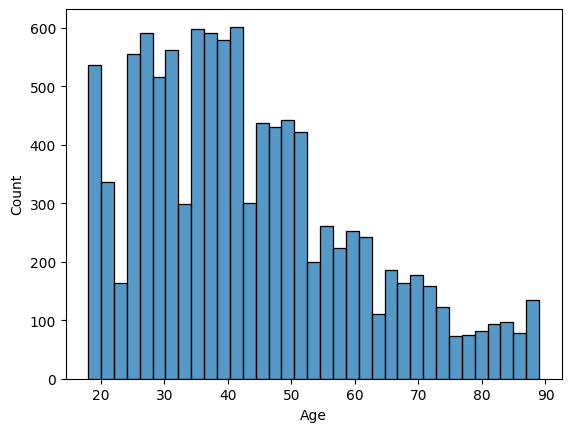

In [74]:
# Age
sns.histplot(data=data,x='Age')

In [75]:
# Profession 
data["Profession"].value_counts()
# sns.histplot(data=data,x='Profession')

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64

In [76]:
# Work_Experience 
data["Work_Experience"].value_counts()
# sns.histplot(data=data,x='Work_Experience')

Work_Experience
1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: count, dtype: int64

In [77]:
# Spending_Score 
data["Spending_Score"].value_counts()

Spending_Score
Low        6494
Average    2599
High       1602
Name: count, dtype: int64

In [78]:
# Family_Size
data["Family_Size"].value_counts()
# sns.histplot(data=data,x='Family_Size')

Family_Size
2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: count, dtype: int64

In [79]:
# Category
# sns.histplot(data=data,x='Category')
data["Category"].value_counts()

Category
Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: count, dtype: int64

# Data Cleaning

In [80]:
data.isna().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Category            108
Segmentation          0
dtype: int64

fill those missing columns


In [81]:
# for data distribution that is somewhat well distributed, we use forward-fill(set with previous value)
# else we use mode(most frequent value)
data["Ever_Married"] = data["Ever_Married"].ffill()
data["Graduated"] = data["Graduated"].ffill()
data["Profession"] = data["Profession"].fillna(data["Profession"].mode()[0])
data["Work_Experience"] = data["Work_Experience"].fillna(data["Work_Experience"].mode()[0])
data["Family_Size"] = data["Family_Size"].ffill()
data["Category"] = data["Category"].fillna(data["Category"].mode()[0])

data.isna().sum()


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

# Data Preprocessing

Convert string and boolean to numeric value

In [82]:
# using one-hot encoding
encoded = pd.get_dummies(data['Gender'], prefix='Gender')
data = pd.concat([data, encoded], axis=1)
data=data.drop(columns="Gender")

encoded = pd.get_dummies(data['Ever_Married'], prefix='Ever_Married')
data = pd.concat([data, encoded], axis=1)
data=data.drop(columns="Ever_Married")

encoded = pd.get_dummies(data['Graduated'], prefix='Graduated')
data = pd.concat([data, encoded], axis=1)
data=data.drop(columns="Graduated")

# there are total of 9 unique professions
# its ok to use one-hot, but we going to use another technique - Frequency Encoding
freq = data['Profession'].value_counts()
data['Profession_Freq'] = data['Profession'].map(freq)
data=data.drop(columns="Profession")

freq = data['Spending_Score'].value_counts()
data['Spending_Score_Freq'] = data['Spending_Score'].map(freq)
data=data.drop(columns="Spending_Score")

freq = data['Category'].value_counts()
data['Category_Freq'] = data['Category'].map(freq)
data=data.drop(columns="Category")


freq = data['Segmentation'].value_counts()
data['Segmentation_Freq'] = data['Segmentation'].map(freq)
data=data.drop(columns="Segmentation")


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10695 non-null  int64  
 1   Work_Experience      10695 non-null  float64
 2   Family_Size          10695 non-null  float64
 3   Gender_Female        10695 non-null  bool   
 4   Gender_Male          10695 non-null  bool   
 5   Ever_Married_No      10695 non-null  bool   
 6   Ever_Married_Yes     10695 non-null  bool   
 7   Graduated_No         10695 non-null  bool   
 8   Graduated_Yes        10695 non-null  bool   
 9   Profession_Freq      10695 non-null  int64  
 10  Spending_Score_Freq  10695 non-null  int64  
 11  Category_Freq        10695 non-null  int64  
 12  Segmentation_Freq    10695 non-null  int64  
dtypes: bool(6), float64(2), int64(5)
memory usage: 731.1 KB


In [84]:
data.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Freq,Spending_Score_Freq,Category_Freq,Segmentation_Freq
0,22,1.0,4.0,False,True,True,False,True,False,1750,6494,1475,3027
1,38,1.0,3.0,True,False,False,True,False,True,935,2599,1475,2818
2,67,1.0,1.0,True,False,False,True,False,True,935,6494,7018,2408
3,67,0.0,2.0,False,True,False,True,False,True,844,1602,7018,2408
4,40,1.0,6.0,True,False,False,True,False,True,1250,1602,7018,2818


## Feature Engineering

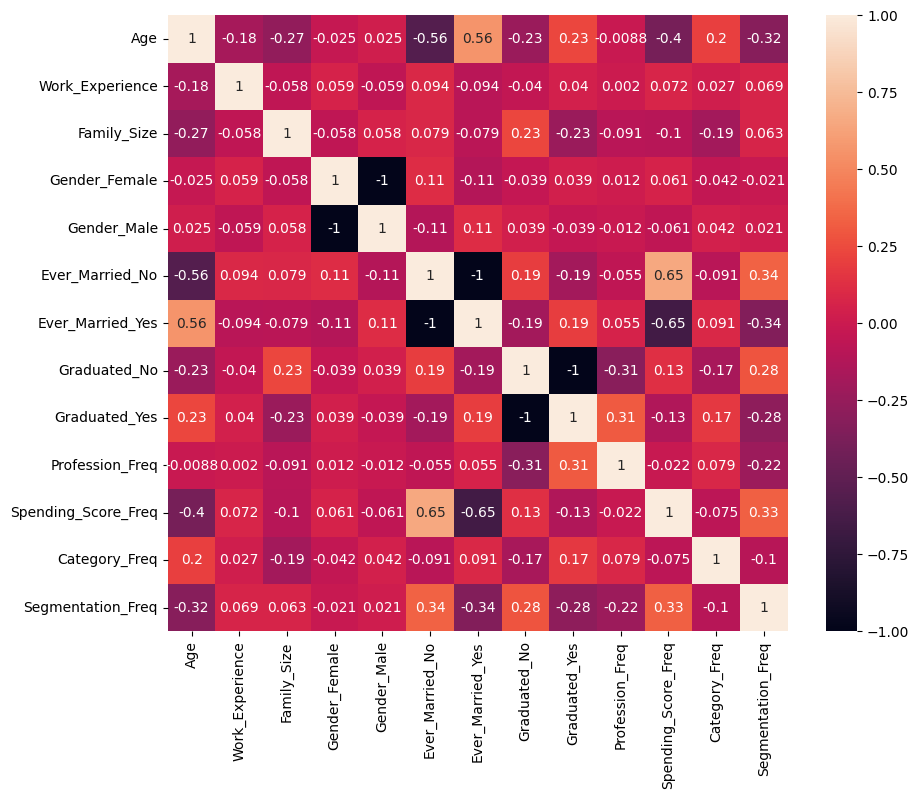

In [ ]:
# Variable Corelation heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Export Data

In [ ]:
# Save to CSV
data.to_csv('clean/data.csv', index=False)